<a href="https://colab.research.google.com/github/dkalenov/Airbnb-Apartments-Rent/blob/main/Airbnb_Apartments_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Berlin Apartments Rent

## Functions for data processing and EDA

In [13]:
# Function for displaying basic information about the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def basic_data_preprocessing(dataframe):
    # Convert all column titles to lowercase with "_" between words
    dataframe.columns = [x.lower().replace(' ', '_') for x in dataframe.columns.values]

    # Basic information about the dataset
    rows_num, columns_num = dataframe.shape
    print(f'Number of records: {rows_num}')
    print(f'Number of columns: {columns_num}\n')
    print('-' * 75)

    # Dataset information
    print("\nDataset Information:")
    display(dataframe.info())
    print()
    print('-' * 75)

    # Checking for missing values
    missing_values = dataframe.isnull().sum()
    if missing_values.sum() > 0:
        print("Missing values:")
        display(pd.DataFrame(missing_values, columns=['Missing Count']))
        display(dataframe[dataframe.isna().any(axis=1)])
    else:
        print("No missing values.")
    print('-' * 75)

    # Checking for zero-filled columns
    zero_columns = dataframe.columns[(dataframe == 0.0).any()]
    zero_count = dataframe[zero_columns].apply(lambda x: x.value_counts().get(0, 0))
    if zero_count.sum() != 0:
        print('Rows with value 0 found:')
        display(pd.DataFrame(zero_count, columns=['Zero Count']))
    else:
        print('No rows with value 0.')
    print('-' * 75)

    # Checking for duplicates
    if dataframe.duplicated().sum() > 0:
        print("Duplicate data found. Number of duplicates:", dataframe.duplicated().sum())
        display(dataframe[dataframe.duplicated(keep=False)])
    else:
        print("No duplicates found.")
    print('-' * 75)

    # Checking for negative values in the dataframe
    # Excluding columns with string data type (object type)
    dataframe_digits = dataframe.select_dtypes(exclude=['object'])
    if (dataframe_digits < 0).sum().sum() > 0:
        print("Negative values found:")
        display(pd.DataFrame((dataframe_digits < 0).sum(), columns=['Negative Value Count']))
    else:
        print('No negative values found.')
    print('-' * 75)

    # Statistical description of the data
    print("\nStatistical Description of the Data:\n")
    display(dataframe.describe())
    print('-' * 75)

    # Data Distribution
    print("\nData Distribution:")

    # Determine the number of graphs and rows for the subplots
    num_graphs = len(dataframe.columns)
    num_rows = (num_graphs + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))

    for i, column in enumerate(dataframe.columns):
        ax = axes[i // 2, i % 2]  # Get the current axis from the subplot grid

        # Categorical feature: countplot
        if dataframe[column].dtype == 'object':
            sns.countplot(data=dataframe, x=column, ax=ax, color='dodgerblue')
            ax.tick_params(axis='x')
            total = float(len(dataframe[column]))
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

        # Numeric feature with less than 8 unique values: countplot
        else:
            if len(dataframe[column].unique()) < 8:
                sns.countplot(data=dataframe, x=column, ax=ax, color='dodgerblue')
                ax.tick_params(axis='x')
                total = float(len(dataframe[column]))
                for p in ax.patches:
                    height = p.get_height()
                    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
            else:
                sns.histplot(data=dataframe, x=column, kde=True, ax=ax, color='dodgerblue')
                ax.axvline(dataframe[column].mean(), color='red', linestyle='--')
        # Set visualization properties for the current axis
        ax.grid(False)
        ax.set_title(column)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_facecolor('white')
        ax.tick_params(top=False, bottom=False, left=False, right=False)

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

In [14]:
# Function for compression of the data type of columns in a pandas DataFrame

import pandas as pd
import numpy as np

def data_type_compression(dataframe):

    for column in dataframe.columns:
        unique_values = dataframe[column].unique()

        # Check if the column has two unique values (potentially a boolean column)
        # Uncomment the code below if you want to convert such columns to boolean type
        # if len(unique_values) == 2:
        #   dataframe[column] = dataframe[column].astype(bool)

        # Check if the column has an integer data type
        if dataframe[column].dtype == int:
            max_value = np.max(dataframe[column])

            # Assign the appropriate integer type based on the maximum value in the column
            if max_value <= np.iinfo(np.int8).max:
                dataframe[column] = dataframe[column].astype(np.int8)
            elif max_value <= np.iinfo(np.int16).max:
                dataframe[column] = dataframe[column].astype(np.int16)
            elif max_value <= np.iinfo(np.int32).max:
                dataframe[column] = dataframe[column].astype(np.int32)
            else:
                dataframe[column] = dataframe[column].astype(np.int64)

        # Check if the column has a float data type
        elif dataframe[column].dtype == float:
            max_value = np.max(dataframe[column])

            # Assign the appropriate float type based on the maximum value in the column
            if max_value <= np.finfo(np.float16).max:
                dataframe[column] = dataframe[column].astype(np.float16)
            elif max_value <= np.finfo(np.float32).max:
                dataframe[column] = dataframe[column].astype(np.float32)
            else:
                dataframe[column] = dataframe[column].astype(np.float64)

In [15]:
# Function for visualizing the distribution of different features by a target feature

import matplotlib.pyplot as plt
import seaborn as sns

def data_distribution_by_target(dataframe, target_feature):
    for column in dataframe.columns:
        if column != target_feature:
            # Create a new figure with size (8, 6)
            plt.figure(figsize=(8, 6))

            # Set style for grid (white with no grid lines)
            sns.set_style("whitegrid", {'axes.grid': False})

            # Categorical feature: barplot
            if dataframe[column].dtype == 'object':
                #plt.xticks(rotation=45, ha='right')
                plot = sns.barplot(x=column, y=target_feature, data=dataframe)

            # Date/time feature: lineplot
            elif dataframe[column].dtype == 'datetime64[ns]':
                plt.xticks(rotation=45, ha='right')
                plot = sns.lineplot(x=column, y=target_feature, data=dataframe)

            # Boolean feature: barplot
            elif dataframe[column].dtype == 'bool':
                plt.xticks([0, 1], ['False', 'True'])
                #plt.xticks(rotation=45, ha='right')
                plot = sns.barplot(x=column, y=target_feature, data=dataframe)

            # Numeric feature: histogram with kernel density estimation (kde)
            elif dataframe[column].dtype in ['float64', 'float32', 'float16']:
                # Determine the number of bins for the histogram
                n_bins = min(30, len(dataframe[column].unique()))
                # Calculate the bin width and range
                binwidth = (dataframe[column].max() - dataframe[column].min()) / n_bins
                binrange = (dataframe[column].min(), dataframe[column].max())
                # Create a histogram with KDE
                sns.histplot(data=dataframe, x=column, bins=n_bins, binwidth=binwidth, binrange=binrange, kde=True, cumulative=False)
                plt.axvline(x=dataframe[column].mean(), color='r', linestyle='--', linewidth=2)   # Add a vertical line at the mean value
                #plt.xticks(rotation=45, ha='right')

            # Other feature types: scatterplot with regression line or countplot
            else:
                if dataframe[column].nunique() > 6:
                    # Create a scatterplot with regression line
                    plot = sns.scatterplot(data=dataframe, x=column, y=target_feature, alpha=0.7)
                    sns.regplot(data=dataframe, x=column, y=target_feature, scatter=False, lowess=True, line_kws={"color": "C1"})
                    # plt.xticks(rotation=45, ha='right')
                    plt.axvline(x=dataframe[column].mean(), color='r', linestyle='--', linewidth=2)
                else:
                    # Create a countplot
                    plot = sns.countplot(data=dataframe, x=column, y=target_feature)

            plot.set_title(f'Data Distribution by {target_feature}: {column}')  # Set title
            plot.set_xlabel(column)  # Set x-axis label
            plot.set_ylabel(target_feature)  # Set y-axis label
            plt.tight_layout() # Adjust plot layout
            plt.show()

In [16]:
# Function for detecting outliers in a dataframe
# Displays boxplots and a table with outlier information

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(dataframe):
    outlier_table = pd.DataFrame(columns=['Column', 'Outlier Count', 'Outlier Percentage'])  # Creating a DataFrame to store outlier information

    for column in dataframe.columns:
        if dataframe[column].dtype != 'object' and len(dataframe[column].unique()) == 2:  # Checking for columns with binary values
            print(f"No outliers in column '{column}' as it has binary values.")  # Printing a message indicating binary values
            outlier_table = pd.concat([outlier_table,
                                       pd.DataFrame({'Column': [column],
                                       'Outlier Count': ['NaN'],
                                       'Outlier Percentage': ['NaN']})],
                                       ignore_index=True)  # Updating the outlier table with binary value information
            print('*' * 75)
            print()
            continue  # Skipping to the next iteration if the column has binary values

        q1 = dataframe[column].quantile(0.25)  # Calculating the first quartile
        q3 = dataframe[column].quantile(0.75)  # Calculating the third quartile
        iqr = q3 - q1  # Calculating the interquartile range
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Counting the number of outliers
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        num_outliers = len(outliers)
        column_len = len(dataframe[column])

        if num_outliers == 0:
            print(f"No outliers in column '{column}'.")
            outlier_table = pd.concat([outlier_table,
                                       pd.DataFrame({'Column': [column],
                                                    'Outlier Count': [0],
                                                    'Outlier Percentage': [0]})],
                                                    ignore_index=True)  # Updating the outlier table with outlier count
        else:
            print(f"Outliers in column '{column}':")
            print(f"Outlier Count: {num_outliers}")
            print(f"Outlier Percentage of total observations: {(num_outliers / column_len) * 100:.2f}%")  # Calculating and displaying outlier percentage
            print("Outlier Values:", ", ".join(outliers[column].astype(str)))

            outlier_table = pd.concat([outlier_table,
                                       pd.DataFrame({'Column': [column],
                                       'Outlier Count': [num_outliers],
                                       'Outlier Percentage': [(num_outliers / column_len) * 100]})],
                                       ignore_index=True)  # Updating the outlier table with outlier information

            # Plotting the boxplot with outliers
            fig, ax = plt.subplots(figsize=(8, 6))
            sns.boxplot(data=dataframe, x=column, ax=ax)
            ax.set_title(f"Outlier Plot for column '{column}'")
            plt.show()

        print('*' * 75)
        print()

    display(outlier_table)

In [17]:
# Correlation analysis on a dataframe with a target feature using some specified correlation types

!pip install phik
from phik import phik_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def correlation_analysis(dataframe, target_feature, correlation_types=['phik'], apply_abs=False):
    target_column = dataframe[target_feature] # Target feature
    correlation_data = [] # List to store correlations
    interval_cols = [col for col in dataframe.columns if col != target_feature] # Set interval columns for phik

    # Calculate correlation coefficients with the target feature for each column and specified correlation types
    for column in dataframe.columns:
        if column != target_feature:
            for corr_type in correlation_types:
                corr_value = None

                if corr_type == 'pearson':
                    corr_value = stats.pearsonr(target_column, dataframe[column])[0]
                elif corr_type == 'spearman':
                    corr_value = stats.spearmanr(target_column, dataframe[column]).correlation
                elif corr_type == 'kendall':
                    corr_value = stats.kendalltau(target_column, dataframe[column]).correlation
                elif corr_type == 'phik':
                    corr_value = phik_matrix(dataframe, interval_cols=interval_cols)[target_feature][column]
                # Apply absolute value, if specified
                if corr_value is not None and apply_abs:
                  corr_value = abs(corr_value)
                correlation_data.append((column, corr_type, corr_value))

    correlation_df = pd.DataFrame(correlation_data, columns=['Column', 'Correlation Type', 'Correlation Value'])  # Create DataFrame
    correlation_df_sorted = correlation_df.pivot(index='Column', columns='Correlation Type', values='Correlation Value')
    correlation_df_sorted = correlation_df_sorted[correlation_types] # Keep only specified correlation types
    correlation_df_sorted = correlation_df_sorted.sort_values(by=correlation_types, ascending=False) # Sort the data by specified correlation types


    # Correlation plot
    fig, axes = plt.subplots(nrows=1, ncols=len(correlation_types), figsize=(8 * len(correlation_types), 6))

    for i, corr_type in enumerate(correlation_types):
        corr_with_target = correlation_df_sorted[corr_type]
        corr_with_target_sorted = corr_with_target.sort_values(ascending=True) # Sort the data

        # Set plot parameters
        sns.barplot(data=corr_with_target_sorted.reset_index(), x='Column', y=corr_type, ax=axes[i], color='dodgerblue')


        axes[i].set_xlabel('Features')
        axes[i].set_ylabel('Correlation')
        axes[i].set_title(corr_type)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75)
    plt.tight_layout(pad=1)
    plt.show()


    # Top 2 features with the highest correlation for each specified correlation type
    top_columns = {}
    for corr_type in correlation_types:
        sorted_columns = correlation_df_sorted[corr_type].abs().sort_values(ascending=False)
        top_columns[corr_type] = sorted_columns.index[:2].tolist()

    # Display correlation table
    print(f"Correlation table with target feature '{target_feature}':")
    display(correlation_df_sorted)

    # Display the top 2 features with the highest correlation for each correlation type
    for corr_type in correlation_types:
        print()
        print(f"Top 2 features with highest correlation ({corr_type.capitalize()}):", top_columns[corr_type])

In [18]:
# Function to find multicollinearity and print correlation matrix

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from phik import phik_matrix

def find_multicollinearity(dataframe, methods=['phik'], threshold=0.8):
    # List to store all multicollinear tables
    multicollinear_tables = []

    # Iterate through each method in the list of methods
    for method in methods:
        # Convert method to lowercase
        method = method.lower()

        # Calculate correlation matrix using specified sort method
        if method in ['pearson', 'kendall', 'spearman']:
            corr_matrix = dataframe.corr(method=method).abs()
        elif method == 'phik':
            interval_cols = [col for col in dataframe.columns]
            corr_matrix = phik_matrix(dataframe, interval_cols=interval_cols)
        else:
            print(f"Invalid method: {method}")
            continue

        # Exclude correlation of a variable with itself
        np.fill_diagonal(corr_matrix.values, np.NaN)

        # Create a larger figure size based on the number of features
        n = corr_matrix.shape[0]
        fig_width = 6 + n * 0.5
        fig_height = 4 + n * 0.3

        # Plot correlation matrix as heatmap with adjusted figure size
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", mask=np.isnan(corr_matrix))
        plt.title(f"Correlation Matrix ({method})")
        plt.show()

        # Initialize an empty list to store multicollinear features
        multicollinear_table = []

        # Iterate through each pair of multicollinear features and their correlation percentages
        for i in range(n):
            for j in range(i+1, n):
                # Check if the correlation between the two features is above the threshold
                if corr_matrix.iloc[i, j] > threshold:
                    feature1 = corr_matrix.columns[i]
                    feature2 = corr_matrix.columns[j]
                    # Append the pair of multicollinear features and their correlation percentage to the list
                    multicollinear_table.append({'Feature 1': feature1, 'Feature 2': feature2, 'Correlation': corr_matrix.iloc[i, j]})

        # Create a dataframe from the list of multicollinear features
        multicollinear_table = pd.DataFrame(multicollinear_table)

        if not multicollinear_table.empty:
            # Sort the multicollinear table by correlation in descending order
            multicollinear_table = multicollinear_table.sort_values(by='Correlation', ascending=False)
            # Append the multicollinear table to the list of multicollinear tables
            multicollinear_tables.append((method, multicollinear_table))

    # Print all multicollinear tables
    if multicollinear_tables:
        for method, table in multicollinear_tables:
            print(f"\nMulticollinearity Table ({method})")
            display(table)
    else:
        print("\nNo features with high multicollinearity!")

## Imports

In [1]:
import pandas as pd

df_wk = pd.read_csv('https://raw.githubusercontent.com/dkalenov/Airbnb-Apartments-Rent/main/berlin_weekdays.csv')
df_wend = pd.read_csv('https://raw.githubusercontent.com/dkalenov/Airbnb-Apartments-Rent/main/berlin_weekends.csv')

In [2]:
df_wk.head()

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  185.799757  Private room        False          True   
1           1  194.914462  Private room        False          True   
2           2  176.217631  Private room        False          True   
3           3  207.768533  Private room        False          True   
4           4  150.743199  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0               True      0    0                10.0   
1              5.0              False      0    1                 9.0   
2              2.0              False      0    0                 9.0   
3              3.0               True      0    0                10.0   
4              2.0              False      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        98.0         1  3.582211    0.174706  105.063708   
1                        86.0         1  3.525410    0.511922   75.339529   
2                        91.0         1  3.801713    0.281397   73.669176   
3                        97.0         1  0.982408    0.705573  133.187409   
4                        99.0         1  8.869697    2.187188   39.860151   

   attr_index_norm  rest_index  rest_index_norm       lng       lat  
0        16.019042  148.941114        30.710638  13.42344  52.49150  
1        11.487002  106.442356        21.947685  13.46800  52.51900  
2        11.232324  105.440205        21.741048  13.47096  52.51527  
3        20.307057  198.233362        40.874362  13.42281  52.53139  
4         6.077469   50.996308        10.515090  13.52440  52.47842

In [3]:
df_wend.head()

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  185.799757     Private room        False          True   
1           1  387.491820  Entire home/apt        False         False   
2           2  194.914462     Private room        False          True   
3           3  171.777134     Private room        False          True   
4           4  207.768533     Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                2               True      0    0                10.0   
1                6              False      0    1                10.0   
2                5              False      0    1                 9.0   
3                2              False      0    0                 9.0   
4                3               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        98.0         1  3.582222    0.174708  105.063613   
1                        93.0         2  6.082132    0.480956   52.877461   
2                        86.0         1  3.525398    0.511928   75.339762   
3                        91.0         1  3.801739    0.281385   73.668908   
4                        97.0         1  0.982405    0.705579  133.187395   

   attr_index_norm  rest_index  rest_index_norm       lng       lat  
0        16.013858  148.940768        31.511339  13.42344  52.49150  
1         8.059614   66.884920        14.150816  13.50300  52.50900  
2        11.483331  106.443168        22.520139  13.46800  52.51900  
3        11.228659  105.438990        22.307685  13.47096  52.51527  
4        20.300502  198.233241        41.940128  13.42281  52.53139

Let's merge two tables vertically, creating a 'yes' and 'no' column

In [4]:
df_wk['weekday'] = 1

In [5]:
df_wend['weekday'] = 0

In [6]:
berlin_df = pd.concat([df_wk, df_wend])
berlin_df.head()

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  185.799757  Private room        False          True   
1           1  194.914462  Private room        False          True   
2           2  176.217631  Private room        False          True   
3           3  207.768533  Private room        False          True   
4           4  150.743199  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0               True      0    0                10.0  ...   
1              5.0              False      0    1                 9.0  ...   
2              2.0              False      0    0                 9.0  ...   
3              3.0               True      0    0                10.0  ...   
4              2.0              False      0    0                10.0  ...   

   bedrooms      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0         1  3.582211    0.174706  105.063708        16.019042  148.941114   
1         1  3.525410    0.511922   75.339529        11.487002  106.442356   
2         1  3.801713    0.281397   73.669176        11.232324  105.440205   
3         1  0.982408    0.705573  133.187409        20.307057  198.233362   
4         1  8.869697    2.187188   39.860151         6.077469   50.996308   

   rest_index_norm       lng       lat  weekday  
0        30.710638  13.42344  52.49150        1  
1        21.947685  13.46800  52.51900        1  
2        21.741048  13.47096  52.51527        1  
3        40.874362  13.42281  52.53139        1  
4        10.515090  13.52440  52.47842        1  

[5 rows x 21 columns]

Number of records: 2484
Number of columns: 21

---------------------------------------------------------------------------

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unnamed:_0                  2484 non-null   int64  
 1   realsum                     2484 non-null   float64
 2   room_type                   2484 non-null   object 
 3   room_shared                 2484 non-null   bool   
 4   room_private                2484 non-null   bool   
 5   person_capacity             2484 non-null   float64
 6   host_is_superhost           2484 non-null   bool   
 7   multi                       2484 non-null   int64  
 8   biz                         2484 non-null   int64  
 9   cleanliness_rating          2484 non-null   float64
 10  guest_satisfaction_overall  2484 non-null   float64
 11  bedroom

None


---------------------------------------------------------------------------
No missing values.
---------------------------------------------------------------------------
Rows with value 0 found:


Zero Count
unnamed:_0                  2
room_shared              2411
room_private             1529
host_is_superhost        1845
multi                    1798
biz                      2050
bedrooms                  180
weekday                  1200

---------------------------------------------------------------------------
No duplicates found.
---------------------------------------------------------------------------
No negative values found.
---------------------------------------------------------------------------

Statistical Description of the Data:



unnamed:_0      realsum  person_capacity        multi          biz  \
count  2484.000000  2484.000000      2484.000000  2484.000000  2484.000000   
mean    621.210145   244.583752         2.774960     0.276167     0.174718   
std     359.834043   235.329289         1.188142     0.447191     0.379802   
min       0.000000    64.971487         2.000000     0.000000     0.000000   
25%     310.000000   144.900439         2.000000     0.000000     0.000000   
50%     620.500000   191.175096         2.000000     0.000000     0.000000   
75%     931.000000   278.349070         3.000000     1.000000     0.000000   
max    1283.000000  5857.483407         6.000000     1.000000     1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count         2484.000000                 2484.000000  2484.000000   
mean             9.461755                   94.323671     1.070451   
std              0.849384                    6.809406     0.552033   
min              4.000000                   20.000000     0.000000   
25%              9.000000                   92.000000     1.000000   
50%             10.000000                   96.000000     1.000000   
75%             10.000000                   99.000000     1.000000   
max             10.000000                  100.000000     9.000000   

              dist   metro_dist   attr_index  attr_index_norm   rest_index  \
count  2484.000000  2484.000000  2484.000000      2484.000000  2484.000000   
mean      5.257093     0.836064   110.223416        16.803111   146.875822   
std       3.692649     1.267283    70.676310        10.774273    79.639119   
min       0.180926     0.011376    15.152201         2.309508    19.576924   
25%       2.836557     0.271908    68.380692        10.422633    92.638581   
50%       4.282886     0.450483    91.128207        13.892056   131.109337   
75%       6.665746     0.808505   131.311184        20.019760   185.457015   
max      25.284557    14.273577   656.079318       100.000000   484.982156   

       rest_index_norm          lng          lat      weekday  
count      2484.000000  2484.000000  2484.000000  2484.000000  
mean         30.666967    13.399729    52.509110     0.516908  
std          16.634505     0.071801     0.033257     0.499815  
min           4.141882    13.116320    52.370000     0.000000  
25%          19.378819    13.358110    52.490850     0.000000  
50%          27.410860    13.407420    52.509740     1.000000  
75%          38.818175    13.440238    52.530100     1.000000  
max         100.000000    13.711850    52.641410     1.000000

---------------------------------------------------------------------------

Data Distribution:


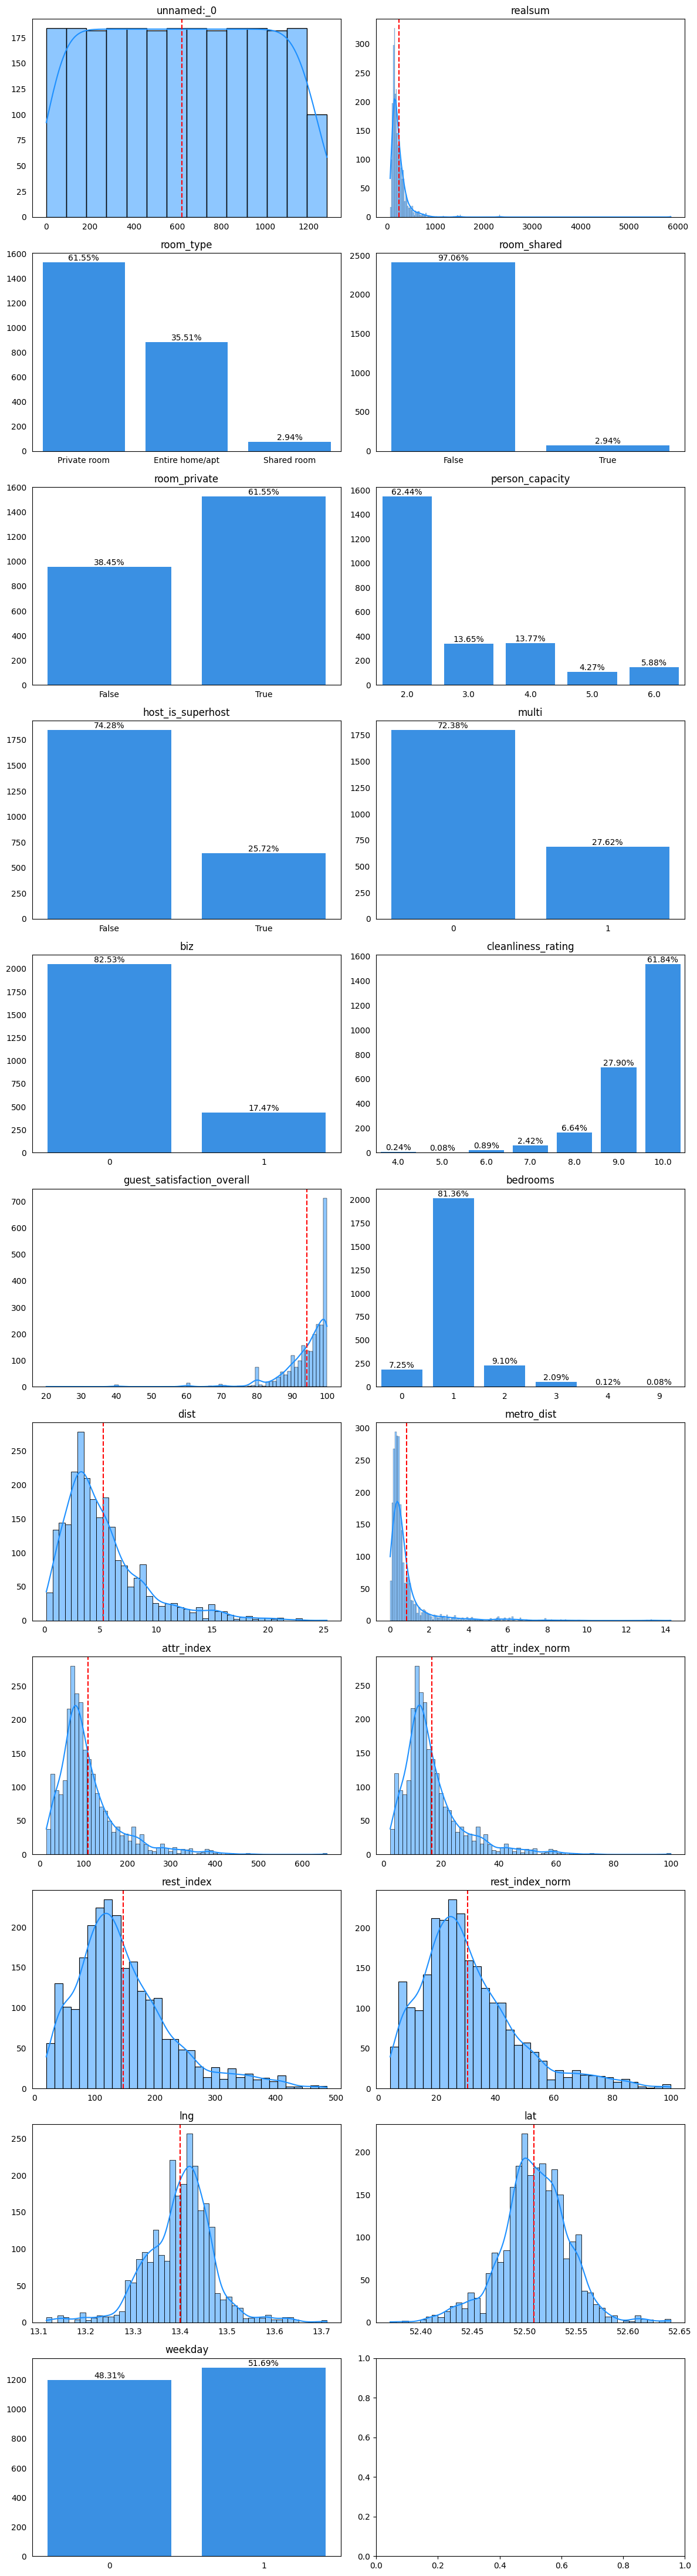

In [19]:
basic_data_preprocessing(berlin_df)

In [ ]:
# переименовать первую колонку, удалить индексы все multi biz, person_capacity to integer,

In [ ]:
# переименовать первую колонку

berlin_df = berlin_df.rename(columns={'Unnamed: 0':'id'})

In [ ]:
# удалить индексы все multi biz

berlin_df = berlin_df.drop([ 'multi','biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm' ], axis=1)

In [ ]:
berlin_df.columns

Index(['id', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat', 'weekday'],
      dtype='object')

In [ ]:
# person_capacity to integer

berlin_df['person_capacity'] = berlin_df['person_capacity'].astype(int)

In [ ]:
berlin_df.dtypes

id                              int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
lng                           float64
lat                           float64
weekday                         int64
dtype: object

1.

In [ ]:
berlin_df.groupby('room_type', as_index=False).agg({'realSum':'median'})

room_type     realSum
0  Entire home/apt  295.643638
1     Private room  160.091614
2      Shared room  148.406095

In [ ]:
round(berlin_df.groupby('room_type')['realSum'].aggregate(['median', 'min', 'max']),2)

median     min      max
room_type                               
Entire home/apt  295.64  111.25  5857.48
Private room     160.09   64.97  2319.34
Shared room      148.41   75.02   417.64

In [ ]:
round(berlin_df.groupby(['room_type', 'person_capacity'])['realSum'].aggregate(['median', 'min', 'max']),2)

median     min      max
room_type       person_capacity                         
Entire home/apt 2                254.98  111.25  1507.43
                3                276.01  122.93   765.17
                4                324.62  157.75  2317.00
                5                358.51  161.03  1029.49
                6                458.07  157.52  5857.48
Private room    2                154.02   64.97  1159.44
                3                168.27   92.78  2319.34
                4                189.31   92.78   622.60
                5                173.88  113.58   319.95
                6                287.70  138.12   426.76
Shared room     2                133.45   81.33   300.32
                3                138.59  136.95   140.23
                4                150.04  125.27   417.64
                5                120.48  101.66   164.53
                6                143.73   75.02   208.70

мультипликаторы по заполняемости можно погуглить

Shared room - стоимость нужно еще поделить на количество человек. При этом комната может быть заполнена не полностью, следовательно выручка за нось будет ниже заявленной в таблице.

Private room - есть большие варианты на 4 и более человек, но они могут быть непопулярными, высока вероятность простоев (особенно в не сезон). На 2 и 3 человека Private room имеют наиболее высокую стоимость.

Entire home/apt

- # Анализ dist, metro_dist и геолокации









<Axes: >

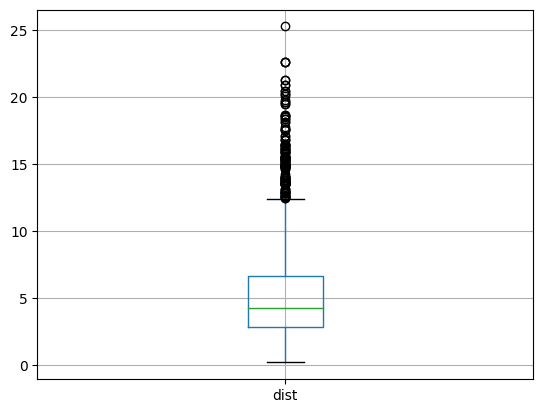

In [ ]:
# выбросы для dist
berlin_df.boxplot(['dist'])

<Axes: >

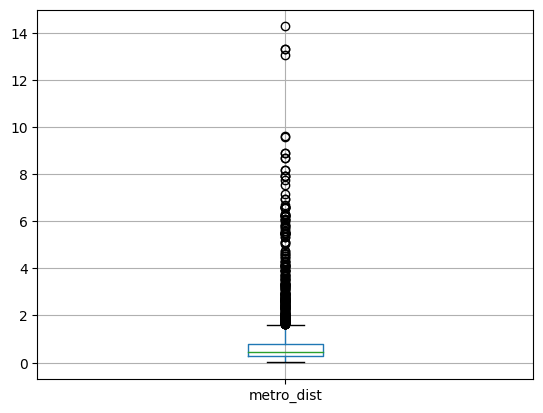

In [ ]:
# выбросы для metro_dist
berlin_df.boxplot(['metro_dist'])

In [ ]:
# матрица корреляции для всех столбцов
berlin_df.corr()

<ipython-input-24-5f9c0c49a219>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  berlin_df.corr()


id   realSum  room_shared  room_private  \
id                          1.000000  0.005567    -0.044434      0.005658   
realSum                     0.005567  1.000000    -0.067590     -0.344528   
room_shared                -0.044434 -0.067590     1.000000     -0.220173   
room_private                0.005658 -0.344528    -0.220173      1.000000   
person_capacity            -0.028852  0.312270     0.215564     -0.440222   
host_is_superhost          -0.068089  0.021214    -0.069685      0.076997   
cleanliness_rating          0.029422  0.045257    -0.103035      0.032135   
guest_satisfaction_overall  0.013309  0.007342    -0.104206      0.071852   
bedrooms                   -0.012154  0.260298    -0.022211     -0.130027   
dist                        0.236876 -0.137852    -0.085016      0.059925   
metro_dist                  0.182770 -0.093406    -0.021788     -0.012762   
lng                        -0.168505 -0.058960     0.041226      0.022694   
lat                         0.051708  0.065903     0.045393     -0.091122   
weekday                     0.058339 -0.019183    -0.013043     -0.025425   

                            person_capacity  host_is_superhost  \
id                                -0.028852          -0.068089   
realSum                            0.312270           0.021214   
room_shared                        0.215564          -0.069685   
room_private                      -0.440222           0.076997   
person_capacity                    1.000000          -0.066055   
host_is_superhost                 -0.066055           1.000000   
cleanliness_rating                -0.126857           0.245033   
guest_satisfaction_overall        -0.143367           0.260165   
bedrooms                           0.368039           0.025000   
dist                              -0.054245           0.038489   
metro_dist                        -0.001150           0.010192   
lng                                0.035903          -0.002777   
lat                                0.071973          -0.014782   
weekday                            0.021669           0.021555   

                            cleanliness_rating  guest_satisfaction_overall  \
id                                    0.029422                    0.013309   
realSum                               0.045257                    0.007342   
room_shared                          -0.103035                   -0.104206   
room_private                          0.032135                    0.071852   
person_capacity                      -0.126857                   -0.143367   
host_is_superhost                     0.245033                    0.260165   
cleanliness_rating                    1.000000                    0.588026   
guest_satisfaction_overall            0.588026                    1.000000   
bedrooms                              0.036240                    0.048037   
dist                                  0.057483                    0.062015   
metro_dist                            0.001605                    0.013291   
lng                                  -0.044261                   -0.017060   
lat                                  -0.043343                   -0.040445   
weekday                               0.016228                   -0.003739   

                            bedrooms      dist  metro_dist       lng  \
id                         -0.012154  0.236876    0.182770 -0.168505   
realSum                     0.260298 -0.137852   -0.093406 -0.058960   
room_shared                -0.022211 -0.085016   -0.021788  0.041226   
room_private               -0.130027  0.059925   -0.012762  0.022694   
person_capacity             0.368039 -0.054245   -0.001150  0.035903   
host_is_superhost           0.025000  0.038489    0.010192 -0.002777   
cleanliness_rating          0.036240  0.057483    0.001605 -0.044261   
guest_satisfaction_overall  0.048037  0.062015    0.013291 -0.017060   
bedrooms                    1.000000  0.001607   -0.011900  0.001467

<ipython-input-25-52ee4bdcc094>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(berlin_df.corr())


<Axes: >

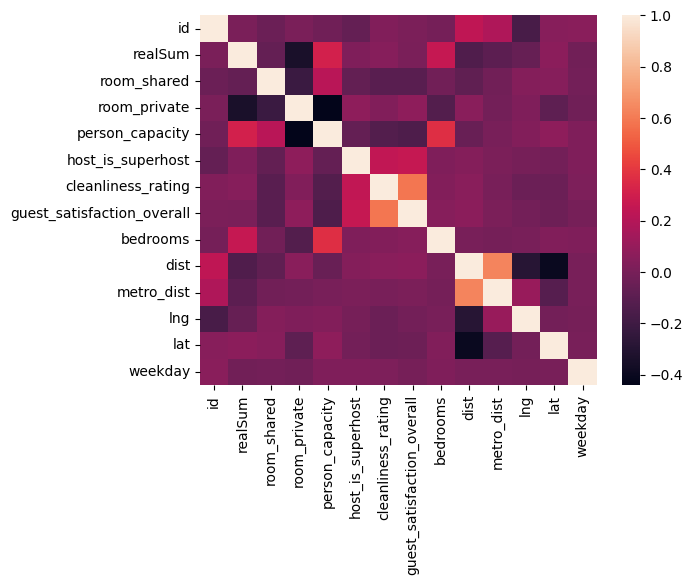

In [ ]:
# график корреляции для всех столбцов
import seaborn as sns
sns.heatmap(berlin_df.corr())

Судя по таблице и грфику корреляцмм, переменная realSum практически не имеет взаимосвязей с другими переменными. И в целом между собой переменные имеют слабую связь. Связь с коэфициентом около 0.6 наблюдается только между dist и metro_dist; и cleanliness_rating  и guest_datisfaction_overall

## Переменные dist и metro_dist

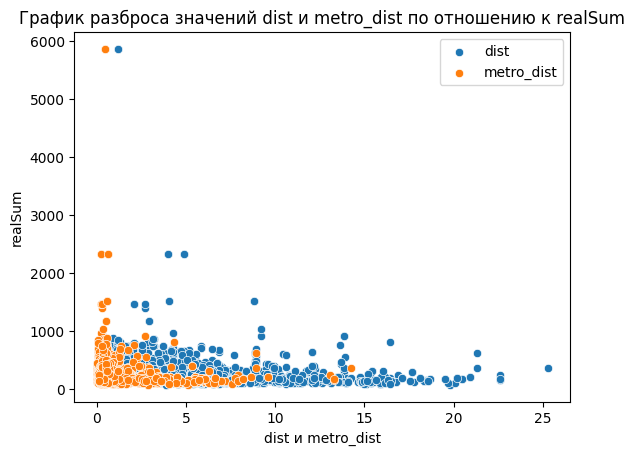

In [ ]:
# График разброса значений 'dist' и 'metro_dist' по отношению к 'realSum'

import seaborn as sns
import matplotlib.pyplot as plt

# Построение графика разброса
sns.scatterplot(x='dist', y='realSum', data=berlin_df, label='dist')
sns.scatterplot(x='metro_dist', y='realSum', data=berlin_df, label='metro_dist')

# Настройка заголовка и меток осей
plt.title('График разброса значений dist и metro_dist по отношению к realSum')
plt.xlabel('dist и metro_dist')
plt.ylabel('realSum')

plt.show()

Судя по графику, взаимосвязь между переменными dist и realSum; и metro_dist и realSum слабая => отдаленность от центра или от метро не является важным факторов формирования стоимости аренды

In [ ]:
# Коэффициенты корреляции Пирсона, Спирмена, Кендалла между dist и realSum
from scipy import stats

pearson_dist = stats.pearsonr(berlin_df["realSum"], berlin_df["dist"]).correlation
spearman_dist = stats.spearmanr(berlin_df["realSum"], berlin_df["dist"]).correlation
kendall_dist = stats.kendalltau(berlin_df["realSum"], berlin_df["dist"]).correlation

print(f'Коэффициент Пирсона между dist и realSum: {pearson_dist}')
print(f'Коэффициент Спирмена между dist и realSum: {spearman_dist}')
print(f'Коэффициент Кендалла между dist и realSum: {kendall_dist}')

Коэффициент Пирсона между dist и realSum: -0.13785228461032364
Коэффициент Спирмена между dist и realSum: -0.2924177298884005
Коэффициент Кендалла между dist и realSum: -0.19862550994310801


In [ ]:
# Коэффициенты корреляции Пирсона, Спирмена, Кендалла между metro_dist и realSum
from scipy import stats

pearson_metro_dist = stats.pearsonr(berlin_df["realSum"], berlin_df["metro_dist"]).correlation
spearman_metro_dist = stats.spearmanr(berlin_df["realSum"], berlin_df["metro_dist"]).correlation
kendall_metro_dist = stats.kendalltau(berlin_df["realSum"], berlin_df["metro_dist"]).correlation

print(f'Коэффициент Пирсона между dist и realSum: {pearson_metro_dist}')
print(f'Коэффициент Спирмена между dist и realSum: {spearman_metro_dist}')
print(f'Коэффициент Кендалла между dist и realSum: {kendall_metro_dist}')

Коэффициент Пирсона между dist и realSum: -0.09340605008164436
Коэффициент Спирмена между dist и realSum: -0.2469606643989638
Коэффициент Кендалла между dist и realSum: -0.16691622287272057


Коэфициенты говорят о слабой отрицательной связи между dist и realSum; и metro_dist и realSum

Разобьём переменные dist и metro_dist на интервалы по децилям. В каждом интервале для переменной realSum определим: среднее, медиану, мин., макс. Также можно принять во внимание типы жилья и количество человек, способных разместиться в апартаментах



In [ ]:
# разбиваем dist и metro_dist на интервалы по децелям


# Находим децели для dist и metro_dist
deciles_dist = [berlin_df['dist'].quantile(i/10) for i in range(1, 11)]
deciles_metro_dist = [berlin_df['metro_dist'].quantile(i/10) for i in range(1, 11)]

# Определяем границы интервалов
intervals_dist = [berlin_df['dist'].min()] + deciles_dist
intervals_metro_dist = [berlin_df['metro_dist'].min()] + deciles_metro_dist


# Разбиваем переменные на интервалы
berlin_df['dist_interval'] = pd.cut(berlin_df['dist'], intervals_dist, include_lowest = True)
berlin_df['metro_dist_interval'] = pd.cut(berlin_df['metro_dist'], intervals_metro_dist, include_lowest = True)

# Удаляем скобки из значений столбцов dist_interval и metro_dist_interval и добавляем "-" в интервалы
berlin_df['dist_interval'] = berlin_df['dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')
berlin_df['metro_dist_interval'] = berlin_df['metro_dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')
# Выводим датафрейм с интервалами
berlin_df.head()

<ipython-input-29-3a057205fa8a>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  berlin_df['dist_interval'] = berlin_df['dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')
<ipython-input-29-3a057205fa8a>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  berlin_df['metro_dist_interval'] = berlin_df['metro_dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')


id     realSum     room_type  room_shared  room_private  person_capacity  \
0   0  185.799757  Private room        False          True                2   
1   1  194.914462  Private room        False          True                5   
2   2  176.217631  Private room        False          True                2   
3   3  207.768533  Private room        False          True                3   
4   4  150.743199  Private room        False          True                2   

   host_is_superhost  cleanliness_rating  guest_satisfaction_overall  \
0               True                10.0                        98.0   
1              False                 9.0                        86.0   
2              False                 9.0                        91.0   
3               True                10.0                        97.0   
4              False                10.0                        99.0   

   bedrooms      dist  metro_dist       lng       lat  weekday  \
0         1  3.582211    0.174706  13.42344  52.49150        1   
1         1  3.525410    0.511922  13.46800  52.51900        1   
2         1  3.801713    0.281397  13.47096  52.51527        1   
3         1  0.982408    0.705573  13.42281  52.53139        1   
4         1  8.869697    2.187188  13.52440  52.47842        1   

    dist_interval metro_dist_interval  
0  3.091 -  3.599      0.171 -  0.245  
1  3.091 -  3.599       0.45 -  0.536  
2  3.599 -  4.283      0.245 -  0.313  
3   0.18 -  1.643      0.666 -  0.945  
4  7.411 -  9.954     1.749 -  14.274

In [ ]:
# Таблица значений по интервалам и количеству людей в номере для dist_inerval
berlin_df.groupby(['dist_interval', 'person_capacity'])["realSum"].aggregate(['min', 'max', 'mean','median', 'count'])

min          max        mean  \
dist_interval   person_capacity                                        
0.18 -  1.643   2                127.605871   844.161915  282.865813   
                3                157.520800   521.875292  248.539310   
                4                143.731887   542.675516  293.929762   
                5                126.437319   663.503786  368.525323   
                6                129.942975  5857.483407  677.591329   
1.643 -  2.538  2                102.131439  1449.471815  268.080151   
                3                120.828270   765.167804  275.052947   
                4                133.214920   660.699261  318.173320   
                5                139.291390   614.424605  352.753958   
                6                139.291390   742.030476  473.380387   
2.538 -  3.091  2                109.142750  1159.437225  210.162904   
                3                139.291390   347.761055  240.628214   
                4                157.520800   794.381602  307.669707   
                5                150.743199   611.152660  374.489024   
                6                182.060391  1449.004394  518.158184   
3.091 -  3.599  2                 91.614471   481.209685  193.173892   
                3                116.154062   415.069646  279.099776   
                4                113.583248   530.989997  296.116253   
                5                194.914462   394.269421  293.252601   
                6                242.357670   858.184538  487.893802   
3.599 -  4.283  2                 64.971487  1507.431990  195.984461   
                3                122.931663   487.052445  233.266336   
                4                142.797046  2317.004768  459.942040   
                5                101.664018   670.281387  288.356124   
                6                231.840703   730.578667  455.657349   
4.283 -  5.19   2                 86.940264   405.954941  171.899007   
                3                133.214920  2319.341872  343.291343   
                4                145.367860   624.006731  303.297654   
                5                278.349070   620.267365  383.168178   
                6                 75.021034   950.733851  439.719218   
5.19 -  6.003   2                 71.982799   738.524820  189.093699   
                3                116.154062   695.755819  248.660977   
                4                139.291390   417.640460  251.085854   
                5                182.060391   588.716463  275.726320   
                6                266.663551   532.392260  384.196504   
6.003 -  7.411  2                 81.331214   404.318968  171.424183   
                3                108.909040   322.286622  177.535997   
                4                111.246144   463.915116  261.204744   
                5                114.050668   670.281387  329.274563   
                6                274.843414   674.721885  395.391231   
7.411 -  9.954  2                 91.614471  1507.431990  190.766470   
                3                 92.783023   423.249509  202.680021   
                4                125.268767   577.264654  274.453897   
                5                182.995232  1029.494251  521.012361   
                6                138.122838   327.194541  239.927082   
9.954 -  25.285 2                 69.645695   904.692905  159.414170   
                3                102.131439   577.498364  190.931648   
                4                 92.783023   637.795644  226.516488   
                5                161.026456   746.938394  309.645015   
                6                157.520800   797.653548  354.141348   

                                     median  count  
dist_interval   person_capacity                     
0.18 -  1.643   2                238.618304    141  
                3                205.314574     20  
                4                299.149294     39  
                5             

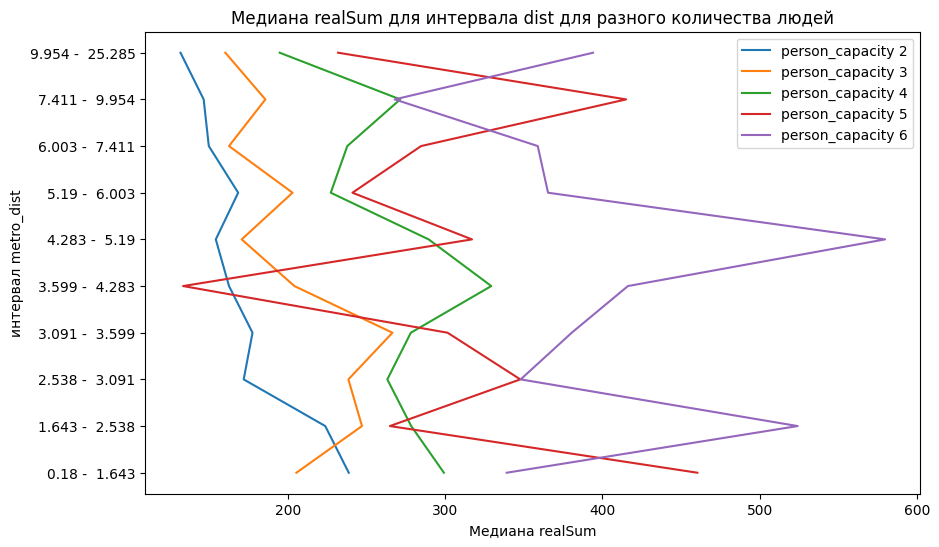

In [ ]:
# График медианы realSum для интервалов dist для разного количества людей
import matplotlib.pyplot as plt

person_capacity_list = [2, 3, 4, 5, 6]

plt.figure(figsize=(10, 6))

for person_capacity in person_capacity_list:
    filtered_df = berlin_df[(berlin_df['person_capacity'] == person_capacity)]
    grouped_df = filtered_df.groupby(['dist_interval'])["realSum"].median().reset_index()

    plt.plot(grouped_df['realSum'], grouped_df['dist_interval'], label=f'person_capacity {person_capacity}')

plt.xlabel('Медиана realSum')
plt.ylabel('интервал metro_dist')
plt.title('Медиана realSum для интервала dist для разного количества людей')
plt.legend()
plt.show()

Судя по данным, меддианная цена аренды квартиры/дома для 2-х человек постепенно снижается по мере отдаления от центра;

для 3-х человек до 3.6 км от центра цена аренды увеличиывется, далее по мере отдаления цена начинает снижаться;

для 4-х человек до 3-х километров от центра медианная стоимость снижается, далее на расстоянии от 3-х до 4.2 км повышается, и далее постепенно снижается;

для 5-х человек по мере отдаления до 4.2 км резко снижается и далее постепенно повышается до показателей максимально приближенных к центру;

для 6-х до 2.5 км от центра цена аренды увеличиывется, далее по мере отдаления цена начинает снижаться, далее в интервале 4.2 - 5.2 возрастает до максимума, далее начинает снижаться до расстаяния в 10км, и в интервале 10 км - 25 немного вырастает;

In [ ]:
berlin_df['metro_dist']

0        0.174706
1        0.511922
2        0.281397
3        0.705573
4        2.187188
          ...    
1195     4.070691
1196     2.620839
1197     2.754838
1198    13.314115
1199    14.273577
Name: metro_dist, Length: 2484, dtype: float64

In [ ]:
# Таблица значений по интервалам и количеству людей в номере для metro_dist_inerval
berlin_df.groupby(['metro_dist_interval', 'person_capacity'])["realSum"].aggregate(['min', 'max', 'mean','median', 'count'])

min          max        mean  \
metro_dist_interval person_capacity                                        
0.0104 -  0.171     2                 92.549313   844.161915  248.039754   
                    3                113.583248   521.875292  277.654813   
                    4                148.406095   542.675516  350.331869   
                    5                101.664018   577.498364  340.282322   
                    6                254.978031   808.404225  462.499870   
0.171 -  0.245      2                 95.120127  1449.471815  247.933742   
                    3                149.808357  2319.341872  347.253339   
                    4                111.246144   794.381602  363.012016   
                    5                113.583248   353.603814  239.973824   
                    6                272.506310   950.733851  541.799103   
0.245 -  0.313      2                 81.331214   738.524820  203.413917   
                    3                147.237543   370.898383  236.925674   
                    4                153.080303   505.515565  309.752365   
                    5                114.050668   458.072357  324.062821   
                    6                162.428718  1449.004394  559.619519   
0.313 -  0.376      2                 71.982799   504.580724  204.211494   
                    3                120.828270   487.052445  236.068736   
                    4                117.790035   660.699261  314.852406   
                    5                128.540712  1029.494251  437.521423   
                    6                148.406095   858.184538  496.777393   
0.376 -  0.45       2                 83.434608   519.538188  197.296155   
                    3                110.311302   660.932972  216.705941   
                    4                119.426007   637.795644  293.182806   
                    5                133.214920   663.503786  337.294168   
                    6                129.942975   649.247453  358.843847   
0.45 -  0.536       2                 81.331214  1159.437225  211.817000   
                    3                122.931663   765.167804  255.482846   
                    4                139.057680   487.052445  253.143405   
                    5                194.914462   620.267365  354.830794   
                    6                143.731887  5857.483407  930.739927   
0.536 -  0.666      2                 91.848182  1507.431990  210.855331   
                    3                124.100215   695.755819  255.645775   
                    4                133.214920  2317.004768  357.526810   
                    5                126.437319   670.281387  378.462101   
                    6                138.122838   864.027297  370.614592   
0.666 -  0.945      2                 83.668318   347.761055  171.648822   
                    3                133.214920   353.603814  211.573948   
                    4                126.437319   521.875292  308.470743   
                    5                146.302702   611.152660  328.830513   
                    6                 79.928952   426.755165  212.699822   
0.945 -  1.749      2                 81.331214   347.994765  162.086917   
                    3                 92.783023   577.498364  206.822563   
                    4                 92.783023   472.094980  239.376092   
                    5                155.417407   680.798355  463.136082   
                    6                 75.021034   742.030476  445.585545   
1.749 -  14.274     2                 64.971487   904.692905  167.444747   
                    3                102.131439   545.012620  186.319763   
                    4                109.142750   371.132093  190.202355   
                    5                161.026456   746.938394  287.463775   
                    6                157.520800   797.653548  345.462902   

                                         median  count  
metro_dist_interval person_capacit

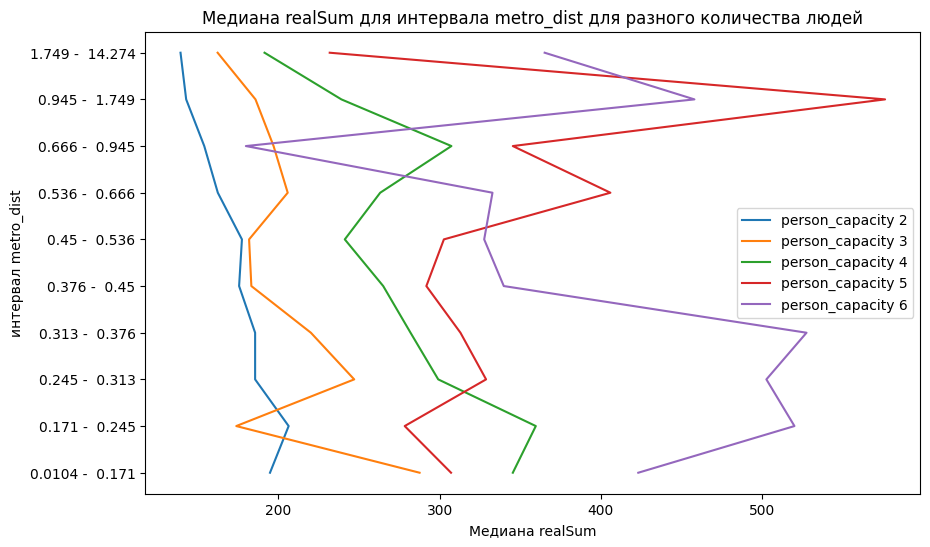

In [ ]:
# График медианы realSum для интервалов metro_dist для разного количества людей
import matplotlib.pyplot as plt

person_capacity_list = [2, 3, 4, 5, 6]

plt.figure(figsize=(10, 6))

for person_capacity in person_capacity_list:
    filtered_df = berlin_df[(berlin_df['person_capacity'] == person_capacity)]
    grouped_df = filtered_df.groupby(['metro_dist_interval'])["realSum"].median().reset_index()

    plt.plot(grouped_df['realSum'], grouped_df['metro_dist_interval'], label=f'person_capacity {person_capacity}')

plt.xlabel('Медиана realSum')
plt.ylabel('интервал metro_dist')
plt.title('Медиана realSum для интервала metro_dist для разного количества людей')
plt.legend()
plt.show()

Судя по графику для всех person_capacity, кроме равного 5, характерно снижение медианной стоимости аренды жилья по мере отдаления от метро.

Однако для person_capacity = 5 заметна обратная зависимость - по мере отдаления от метро стоимость аренды увеличивается.:

## Расположение домов/квартир на основе данных lng и lat

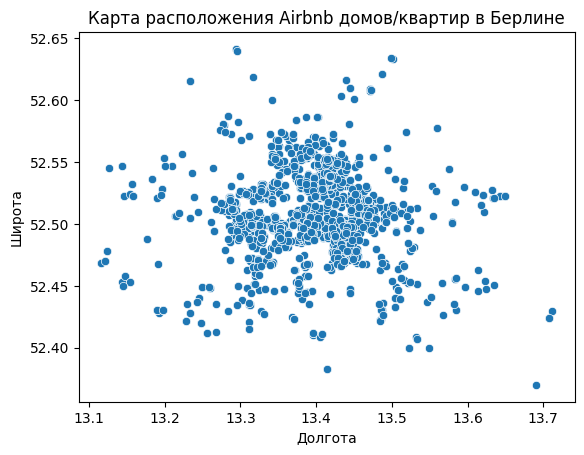

In [ ]:
# расположение домов/квартир на карте
import seaborn as sns

# Построение карты с помощью Seaborn
sns.scatterplot(data=berlin_df, x='lng', y='lat')

# Настройка заголовка и меток осей
plt.title('Карта расположения Airbnb домов/квартир в Берлине')
plt.xlabel('Долгота')
plt.ylabel('Широта')

# Отображение карты
plt.show()

Отобразим эти данные на карте Берлина с описанием каждого дома/квартиры

In [ ]:
!pip install folium # библиотека для визуализации интерактивных карт и геоданных

In [ ]:
berlin_df.columns

Index(['id', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat', 'weekday', 'dist_interval', 'metro_dist_interval'],
      dtype='object')

In [ ]:
berlin_df['metro_dist_interval'].unique()

array(['0.171 -  0.245', '0.45 -  0.536', '0.245 -  0.313',
       '0.666 -  0.945', '1.749 -  14.274', '0.313 -  0.376',
       '0.376 -  0.45', '0.536 -  0.666', '0.945 -  1.749',
       '0.0104 -  0.171'], dtype=object)

In [ ]:
# дома подходящие по критериям
best_flats = berlin_df[(berlin_df['room_type'] == 'Entire home/apt')&
                       (berlin_df['metro_dist'] <= 0.313)&
                       (berlin_df['person_capacity'] == 2) &
                       (berlin_df['bedrooms'] == 1) &
                       (berlin_df['guest_satisfaction_overall'] > 70)]

In [ ]:
best_flats

id     realSum        room_type  room_shared  room_private  \
15      15  375.572590  Entire home/apt        False         False   
41      41  293.540245  Entire home/apt        False         False   
42      42  147.237543  Entire home/apt        False         False   
94      94  209.871927  Entire home/apt        False         False   
103    103  197.251566  Entire home/apt        False         False   
...    ...         ...              ...          ...           ...   
1034  1034  290.034589  Entire home/apt        False         False   
1064  1064  236.514911  Entire home/apt        False         False   
1069  1069  322.286622  Entire home/apt        False         False   
1122  1122  254.978031  Entire home/apt        False         False   
1177  1177  370.898383  Entire home/apt        False         False   

      person_capacity  host_is_superhost  cleanliness_rating  \
15                  2              False                10.0   
41                  2               True                10.0   
42                  2              False                 9.0   
94                  2               True                10.0   
103                 2              False                10.0   
...               ...                ...                 ...   
1034                2              False                 9.0   
1064                2              False                10.0   
1069                2              False                10.0   
1122                2               True                10.0   
1177                2              False                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist       lng  \
15                         100.0         1  6.998011    0.197947  13.32388   
41                          99.0         1  5.593760    0.071927  13.34200   
42                          92.0         1  5.378410    0.226237  13.49325   
94                          99.0         1  7.822140    0.258123  13.31800   
103                         98.0         1  3.656614    0.193114  13.39574   
...                          ...       ...       ...         ...       ...   
1034                        90.0         1  2.873730    0.119442  13.41221   
1064                        96.0         1  2.013417    0.125801  13.41389   
1069                       100.0         1  2.678440    0.256003  13.41229   
1122                       100.0         1  9.532839    0.206185  13.32400   
1177                       100.0         1  5.888612    0.300858  13.35308   

           lat  weekday   dist_interval metro_dist_interval  
15    52.49587        1  6.003 -  7.411      0.171 -  0.245  
41    52.50200        1   5.19 -  6.003     0.0104 -  0.171  
42    52.51124        1   5.19 -  6.003      0.171 -  0.245  
94    52.48700        1  7.411 -  9.954      0.245 -  0.313  
103   52.49311        1  3.599 -  4.283      0.171 -  0.245  
...        ...      ...             ...                 ...  
1034  52.54912        0  2.538 -  3.091     0.0104 -  0.171  
1064  52.54145        0  1.643 -  2.538     0.0104 -  0.171  
1069  52.54736        0  2.538 -  3.091      0.245 -  0.313  
1122  52.45900        0  7.411 -  9.954      0.171 -  0.245  
1177  52.48735        0   5.19 -  6.003      0.245 -  0.313  

[109 rows x 17 columns]

In [ ]:
berlin_df[berlin_df['metro_dist'] <= 0.313]

id     realSum        room_type  room_shared  room_private  \
0        0  185.799757     Private room        False          True   
2        2  176.217631     Private room        False          True   
6        6  417.406750  Entire home/apt        False         False   
11      11   95.120127     Private room        False          True   
15      15  375.572590  Entire home/apt        False         False   
...    ...         ...              ...          ...           ...   
1177  1177  370.898383  Entire home/apt        False         False   
1180  1180  173.880527  Entire home/apt        False         False   
1187  1187  170.608582     Private room        False          True   
1191  1191  231.840703     Private room        False          True   
1192  1192  127.605871     Private room        False          True   

      person_capacity  host_is_superhost  cleanliness_rating  \
0                   2               True                10.0   
2                   2              False                 9.0   
6                   6               True                10.0   
11                  2              False                 9.0   
15                  2              False                10.0   
...               ...                ...                 ...   
1177                2              False                10.0   
1180                2              False                10.0   
1187                2              False                 9.0   
1191                2              False                10.0   
1192                2              False                 9.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist       lng  \
0                           98.0         1  3.582211    0.174706  13.42344   
2                           91.0         1  3.801713    0.281397  13.47096   
6                           97.0         2  3.838824    0.298430  13.37279   
11                          90.0         1  3.556290    0.187019  13.46714   
15                         100.0         1  6.998011    0.197947  13.32388   
...                          ...       ...       ...         ...       ...   
1177                       100.0         1  5.888612    0.300858  13.35308   
1180                       100.0         0  9.079524    0.222133  13.38573   
1187                        93.0         1  3.769378    0.291099  13.38274   
1191                        97.0         2  5.878112    0.131641  13.34903   
1192                        94.0         1  5.832898    0.153440  13.35218   

           lat  weekday   dist_interval metro_dist_interval  
0     52.49150        1  3.091 -  3.599      0.171 -  0.245  
2     52.51527        1  3.599 -  4.283      0.245 -  0.313  
6     52.50157        1  3.599 -  4.283      0.245 -  0.313  
11    52.51507        1  3.091 -  3.599      0.171 -  0.245  
15    52.49587        1  6.003 -  7.411      0.171 -  0.245  
...        ...      ...             ...                 ...  
1177  52.48735        0   5.19 -  6.003      0.245 -  0.313  
1180  52.44401        0  7.411 -  9.954      0.171 -  0.245  
1187  52.49655        0  3.599 -  4.283      0.245 -  0.313  
1191  52.49035        0   5.19 -  6.003     0.0104 -  0.171  
1192  52.48870        0   5.19 -  6.003     0.0104 -  0.171  

[745 rows x 17 columns]

In [ ]:
# !pip install folium # библиотека для визуализации интерактивных карт и геоданных

In [ ]:
import folium


# Создание центральной точки карты для точного определения местоположения карты
center_lat, center_lng = berlin_df['lat'].mean(), berlin_df['lng'].mean()

# Создание объекта карты Берлина
map_berlin = folium.Map(location=[center_lat, center_lng], zoom_start=11)

# Отметка расположения домов на карте с всплывающей информацией
for index, row in berlin_df.iterrows():
    tooltip = (f"ID: {row['id']}<br>\
              Стоимость аренды: {round(row['realSum'], 2)} €<br>\
              Тип жилья: {row['room_type']} <br>\
              Общий номер: {row['room_shared']} <br>\
              Личная комната: {row['room_private']} <br>\
              Вместимость: {row['person_capacity']} <br>\
              Статус superhost: {row['host_is_superhost']} <br>\
              Рейтинг чистоты: {row['cleanliness_rating']} <br>\
              Оценка постояльцев: {row['guest_satisfaction_overall']} <br>\
              Количество спален: {row['bedrooms']} <br>\
              Расстояние до центра: {round(row['dist'], 4)} км<br>\
              Расстояние до метро: {round(row['metro_dist'], 4)} км<br>\
              Широта и долгота: {row['lat'], row['lng']}"
              )
    color = 'red' if row['id'] in best_flats['id'].values else 'blue'
    folium.Marker(location=[row['lat'], row['lng']], tooltip=tooltip, icon=folium.Icon(color=color)).add_to(map_berlin)

# Отображение карты
map_berlin